# DBSCAN: Density-Based Spatial Clustering of Applications with Noise

DBSCAN é um algoritmo de agrupamento baseado na ideia de densidade de pontos no espaço. Diferente de métodos como K-Means, ele não exige a definição prévia do número de clusters e pode identificar formas arbitrárias de agrupamento, além de detectar outliers de forma nativa.

## Conceitos Fundamentais

### ε (epsilon)
Distância máxima entre dois pontos para que sejam considerados vizinhos.

### min_samples
Número mínimo de pontos (incluindo o próprio ponto) necessários dentro da ε-vizinhança para que um ponto seja considerado um **ponto central** (core point).

### Tipos de pontos
- **Ponto central (core point)**: possui pelo menos `min_samples` vizinhos dentro do raio ε.
- **Ponto de borda (border point)**: não é um ponto central, mas está dentro da ε-vizinhança de um ponto central.
- **Ruído (noise point)**: ponto que não é nem central nem de borda.

## Funcionamento do Algoritmo

1. Para cada ponto, calcula a ε-vizinhança.
2. Se um ponto possui vizinhos suficientes (≥ `min_samples`), é considerado um ponto central.
3. Todos os pontos dentro da ε-vizinhança de um ponto central fazem parte do mesmo cluster.
4. O processo é repetido para cada ponto central conectado.
5. Pontos que não pertencem a nenhum cluster são marcados como ruído (`label = -1`).

## Vantagens

- Identifica clusters de forma arbitrária.
- Robusto a outliers.
- Não requer número de clusters previamente definido.
- Poucos hiperparâmetros (`eps` e `min_samples`).

## Desvantagens

- Difícil determinar valores ideais para `eps` e `min_samples`.
- Não funciona bem quando há grande variação de densidade entre os clusters.
- Pode ter alto uso de memória se `eps` for muito grande.

In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, _ = make_moons(n_samples=1000, noise=0.05)

In [3]:
# aplicação do DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [4]:
labels = dbscan.labels_
core_indices = dbscan.core_sample_indices_
core_samples = dbscan.components_

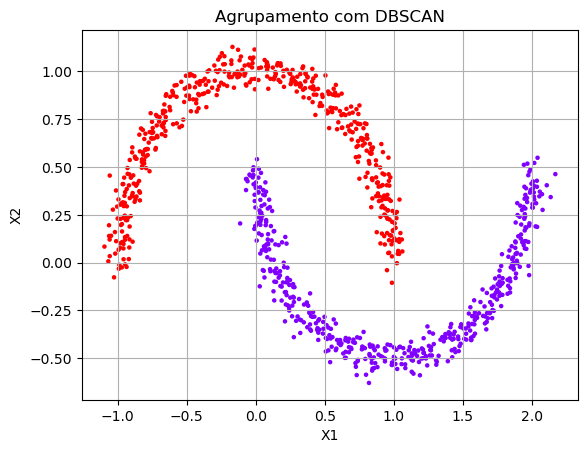

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=5)
plt.title("Agrupamento com DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

In [6]:
# classificador KNN treinado com pontos centrais
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(core_samples, labels[core_indices])

KNeighborsClassifier(n_neighbors=50)

In [8]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
y_pred = knn.predict(X_new)

print("Previsões iniciais:", y_pred)

Previsões iniciais: [1 0 1 0]


In [10]:
# ajuste para rejeitar outliers
distances, indices = knn.kneighbors(X_new, n_neighbors=1)
y_pred_adjusted = labels[core_indices][indices]
y_pred_adjusted[distances > 0.2] = -1

print("Previsões ajustadas:", y_pred_adjusted.ravel())

Previsões ajustadas: [-1  0  1 -1]
